In [694]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer as sia
from nltk.stem import WordNetLemmatizer,SnowballStemmer
import pandas as pd
import re
import numpy as np
import emoji
from nltk.tokenize import word_tokenize,wordpunct_tokenize
import scipy
import matplotlib.pyplot as plt
import winreg
import chart_studio
import chart_studio.plotly as py

In [690]:
def get_key(name):
    key = winreg.CreateKey(winreg.HKEY_CURRENT_USER,r"Environment")
    return winreg.QueryValueEx(key,name)[0]

In [691]:
plotly_key = get_key("plotly_key")

In [695]:
chart_studio.tools.set_credentials_file(username = "ANyingifa",api_key=plotly_key)

In [302]:
from nltk.collocations import ngrams

In [4]:
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [5]:
puncs = '!"#$%&”\'()*+,-./:;<=>?@“[\\]^_`{|}~’—‘'

In [295]:
sw_orig = set(ENGLISH_STOP_WORDS).union(stopwords.words("english"))

In [130]:
my_stopwords = set(ENGLISH_STOP_WORDS).union(stopwords.words("english"))

In [128]:
other_words.extend(["lol","tomorrow","age"])

In [131]:
my_stopwords = my_stopwords.union(other_words)

In [494]:
nrc = pd.read_excel(r"C:\Users\Atonye\Documents\NRC-Emoticon-Lexicon\NRC-Emotion-Lexicon\NRC-Emotion-Lexicon-v0.92\NRC-Emotion-Lexicon-v0.92-English.xlsx",
             sheet_name="Words",
             header =0,index_col =0)

In [8]:
df = pd.read_pickle("Cleaned_df")

In [187]:
emoji_pattern = emoji.get_emoji_regexp("en")
hashtag_pattern = r"#[a-zA-Z0-9_]+"
rt_pattern = "RT\s@\w+"
mention_pattern = r"@[a-zA-Z0-9_]+"
table = str.maketrans({i:" " for i in puncs})
link_pattern = r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?'
amp_pattern = r"&amp"

In [10]:
snow = SnowballStemmer(language = "english")
lemmer = WordNetLemmatizer()

In [171]:
# desired_tags = ["JJ","NN","RB","VB"]
desired_tags = ["NN","JJ"]

In [192]:
def clean_tweets(text):
    pos = True
    text = text.lower()
    text = re.sub(amp_pattern,"",text)
    text = re.sub(link_pattern,"",text)
    text = re.sub(emoji_pattern,"",text)
    text = re.sub(hashtag_pattern,"",text)
    text = re.sub(rt_pattern,"",text)
    text = re.sub(mention_pattern,"",text)
    text = re.sub(r'(.)\1+', r'\1'+r'\1',text)
    text = [ i for i in word_tokenize(text) if i not in my_stopwords]
    text = " ".join(text).translate(table)
    text = re.sub(r"\d+","",text)
    text = [ i for i in word_tokenize(text) if i not in my_stopwords]
    if pos:
        text = [word for (word,tag) in nltk.pos_tag(text) if tag[:2] in desired_tags]
    text = [lemmer.lemmatize(i) for i in text]
    text = [i for i in text if i not in most_common]
    text = [i for i in text if len(i)>2]
    return " ".join(text)

In [245]:
cv = CountVectorizer(stop_words = "english",preprocessor = clean_tweets,min_df = 10)

In [246]:
data_dtm_nouns = cv.fit_transform(df["Tweet"])

In [247]:
dtm_noun = pd.DataFrame(data_dtm_nouns.toarray(),columns = cv.get_feature_names())

In [66]:
#after getting top words to add as stopwords
most_common = dtm_noun.sum().sort_values(ascending = False)[:10].index

In [248]:
dtm_sparse = scipy.sparse.csr_matrix(dtm_noun.T)

In [249]:
corpus = gensim.matutils.Sparse2Corpus(dtm_sparse)

In [250]:
dict_words = {k:i for i,k in cv.vocabulary_.items()}

In [282]:
model = gensim.models.LdaModel(corpus = corpus,num_topics = 5,passes = 40,iterations=200,id2word=dict_words)

In [283]:
model.print_topics()

[(0,
  '0.028*"good" + 0.021*"new" + 0.018*"snipe" + 0.017*"wesley" + 0.017*"wan" + 0.014*"men" + 0.014*"woman" + 0.012*"couple" + 0.012*"point" + 0.012*"kid"'),
 (1,
  '0.035*"kid" + 0.019*"week" + 0.019*"change" + 0.018*"baby" + 0.017*"minute" + 0.016*"house" + 0.015*"child" + 0.015*"way" + 0.015*"married" + 0.015*"free"'),
 (2,
  '0.027*"man" + 0.027*"young" + 0.025*"wait" + 0.022*"happy" + 0.021*"big" + 0.020*"way" + 0.020*"great" + 0.015*"hair" + 0.015*"look" + 0.013*"bad"'),
 (3,
  '0.040*"friend" + 0.038*"thing" + 0.021*"goal" + 0.020*"mean" + 0.018*"need" + 0.015*"best" + 0.014*"idea" + 0.013*"home" + 0.012*"fine" + 0.012*"hard"'),
 (4,
  '0.019*"school" + 0.019*"guy" + 0.018*"god" + 0.016*"decade" + 0.016*"second" + 0.015*"sure" + 0.015*"mom" + 0.015*"die" + 0.015*"ready" + 0.014*"right"')]

In [83]:
df_copy = df.copy()

In [291]:
df_copy["Cleaned"] = df["Tweet"].apply(clean_tweets)

In [483]:
def mini_clean_tweets(text):
    pos = False
    text = text.lower()
    text = re.sub(amp_pattern,"",text)
    text = re.sub(link_pattern,"",text)
    text = re.sub(emoji_pattern,"",text)
    text = re.sub(hashtag_pattern,"",text)
    text = re.sub(rt_pattern,"",text)
    text = re.sub(mention_pattern,"",text)
    text = re.sub(r'(.)\1+', r'\1'+r'\1',text)
    text = text.translate(table)
    text = re.sub(r"\d+","",text)
    if pos:
        text = [word for (word,tag) in nltk.pos_tag(text) if tag[:2] in desired_tags]
    text = [lemmer.lemmatize(i) for i in word_tokenize(text)]
    return " ".join(text)

In [298]:
df_copy["Mini_Cleaned"] = df["Tweet"].apply(mini_clean_tweets)

In [285]:
corpus_transformed = model[corpus]

In [286]:
dom_classes = [sorted(i,key = lambda x:x[1],reverse = True)[0][0] for i in list(corpus_transformed)]

In [287]:
df_copy_2["Dominant Topic"] = dom_classes

In [440]:
from wordcloud import WordCloud
from PIL import Image
img = np.array(Image.open(r"C:\Users\Atonye\Downloads\Emotion Detection Papers\thought_cloud.jpg"))
wc = WordCloud(stopwords=my_stopwords,max_words = 4000,background_color="white",mask = img,
              width=img.shape[1]*40,height=img.shape[0]*40,contour_width = 1,max_font_size = 256,font_path = "arial")
wc.generate(" ".join(df_copy["Cleaned"]))


In [441]:
x_labs = [0]
x_labs.extend([i[0]+", "+i[1] for i in list(top_12_bigrams.index)])

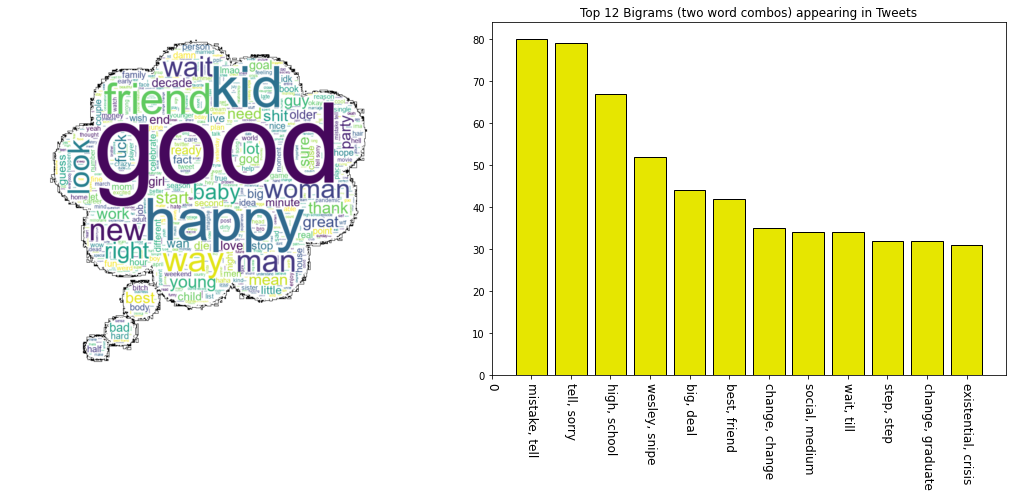

In [451]:
fig,ax = plt.subplots(1,2,figsize = (15,7))
ax[0].imshow(wc,interpolation = "bilinear")
ax[0].axis("off")

ax[1].bar(x = [i+1 for i in range(12)],height = top_12_bigrams.values,color = "#e6e600",edgecolor = "black")
ax[1].set_xticks([i for i in range(13)])
ax[1].set_xticklabels(x_labs,rotation = -90,fontsize=12)
ax[1].set_title("Top 12 Bigrams (two word combos) appearing in Tweets")
plt.tight_layout()
plt.savefig("wcbar.png", bbox_inches = 'tight')

In [308]:
df_copy["Bigrams_cleaned"] = df_copy["Cleaned"].apply(lambda x: list(ngrams(word_tokenize(x),2)))
df_copy["Bigrams_Minicleaned"] = df_copy["Mini_Cleaned"].apply(lambda x: list(ngrams(word_tokenize(x),2)))

In [317]:
bigrams_1 = pd.Series([p for i in df_copy["Bigrams_cleaned"] for p in i])
bigrams_2 = pd.Series([p for i in df_copy["Bigrams_Minicleaned"] for p in i])

In [322]:
top_12_bigrams = bigrams_1.value_counts()[:12]

In [459]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [463]:
sia = SentimentIntensityAnalyzer()

In [465]:
sia.polarity_scores("How are you")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [484]:
df_copy["Mini_Cleaned"] =df_copy["Tweet"].apply(mini_clean_tweets)

In [477]:
df_copy["Polarity_Uncleaned"] = df_copy["Tweet"].apply(lambda x:sia.polarity_scores(x))

In [487]:
df_copy["Polarity_cleaned"] = df_copy["Cleaned"].apply(lambda x:sia.polarity_scores(x))

In [485]:
df_copy["Polarity_Minicleaned"] = df_copy["Mini_Cleaned"].apply(lambda x:sia.polarity_scores(x))

In [498]:
emotions = nrc.iloc[:,2:].columns

In [503]:
df_sents = df_copy.copy()[['Date', 'Tweet','Mini_Cleaned','Polarity_Minicleaned' ]]

In [521]:
df_sents[["neg","neu","pos","compound"]] =df_sents["Polarity_Minicleaned"].apply(pd.Series)

In [517]:
print("Textblob Results: ", TextBlob("I am happy").sentiment)
print("NLTK SIA Results: ",sia.polarity_scores("I am happy"))

Textblob Results:  Sentiment(polarity=0.8, subjectivity=1.0)
NLTK SIA Results:  {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}


In [528]:
pos_neg = (df_sents["pos"]> df_sents["neg"]).value_counts()

In [583]:
emotions = nrc.columns[2:]

In [545]:
emotions_dict = {}
for i in emotions:
    emotions_dict[i] = {x:y for x,y in (nrc[emotions].T).loc[i].to_dict().items() if y == 1}

In [584]:
for emotion in emotions:
    df_sents[f"{emotion}"] = df_sents["Mini_Cleaned"].apply(lambda x: np.sum([i in emotions_dict[emotion] for i in word_tokenize(x)]))

In [649]:
nrc_feelings = df_sents[df_sents.columns[8:]].sum().sort_values(ascending = False)

In [595]:
import seaborn as sns

<AxesSubplot:>

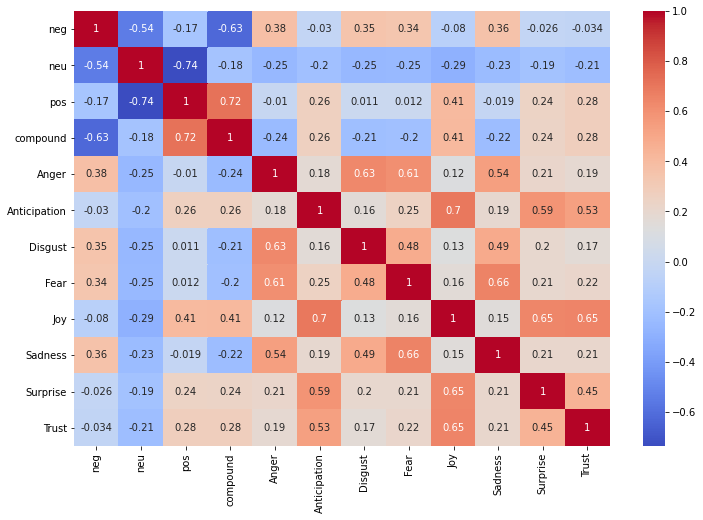

In [655]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sents[df_sents.columns[4:]].corr(),cmap = "coolwarm", annot = True)

In [653]:
sent_list = pd.DataFrame([("pos",i) for i in df_sents["pos"]] +[("neg",i) for i in df_sents["neg"]]+[("neu",i) for i in df_sents["neu"]],columns = ["Sentiment","Score"])

In [657]:
nrc_feelings

Anticipation    11639
Trust            9672
Joy              9282
Fear             5767
Sadness          5600
Surprise         5319
Anger            4552
Disgust          3718
dtype: int64

In [658]:
ecols = ['lightseagreen','lightseagreen','lightseagreen',"indianred","indianred",'lightseagreen',"indianred","indianred"]

In [696]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{"type":"Box"},{"type":"bar"}]],
                   subplot_titles = ["Sentiment Results of Tweets","NRC Word Association"])
fig.add_trace(go.Box(y = sent_list.query("Sentiment == 'pos'")["Score"], name='Positive',
                marker_color = 'lightseagreen'),row = 1,col = 1)
fig.add_trace(go.Box(y = sent_list.query("Sentiment == 'neg'")["Score"], name = 'Negative',
                marker_color = 'indianred',notched = True),row = 1,col = 1)
fig.add_trace(go.Box(y = sent_list.query("Sentiment == 'neu'")["Score"], name = 'Neutral',
                marker_color = 'grey',notched = True),row = 1,col = 1)
fig.add_trace(go.Bar(x = nrc_feelings.index,y = nrc_feelings.values,marker_color = ecols),row = 1,col = 2)

fig.update_layout({"plot_bgcolor":"white","showlegend":False,"width":1000,"height":500})
fig.update_annotations({"font":{"size":20,"color":"black","family":"Old Standard TT"}})
fig.update_xaxes(color="black",tickfont = {"family":"Old Standard TT","size":20},linecolor = "black")
fig.update_yaxes(color="black",tickfont = {"family":"Old Standard TT","size":14},linecolor = "black")
py.plot(fig,auto_open = True)

'https://plotly.com/~ANyingifa/71/'

In [620]:
sent_list.query("Sentiment == 'pos'")

,Sentiment,Score
0,pos,0.123
1,pos,0.451
2,pos,0.000
3,pos,0.247
4,pos,0.000
...,...,...
16531,pos,0.307
16532,pos,0.000
16533,pos,0.000
16534,pos,0.643
